In [1]:
# BSA_sales_analysis.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print("Libraries loaded successfully.")

Libraries loaded successfully.


In [2]:
# Create synthetic dataset
np.random.seed(42)

regions = ["London", "South East", "North West", "Scotland", "Wales", "East of England"]
age_groups = ["18-25", "26-35", "36-45", "46-55", "56+"]
income_bands = ["<£25k", "£25k-£50k", "£50k-£75k", "£75k+"]

data = {
    "Region": np.random.choice(regions, 500),
    "Sales_Units": np.random.randint(10, 400, 500),
    "Revenue_GBP": np.round(np.random.uniform(1000, 30000, 500), 2),
    "Profit_GBP": np.round(np.random.uniform(100, 8000, 500), 2),
    "Customer_Age_Group": np.random.choice(age_groups, 500),
    "Customer_Income_Band": np.random.choice(income_bands, 500)
}

df = pd.DataFrame(data)

# Compute profit margin
df["Profit_Margin"] = np.round((df["Profit_GBP"] / df["Revenue_GBP"]) * 100, 2)

df.head()

,Region,Sales_Units,Revenue_GBP,Profit_GBP,Customer_Age_Group,Customer_Income_Band,Profit_Margin
0,Scotland,298,7879.58,5973.72,36-45,£25k-£50k,75.81
1,Wales,263,3951.69,1370.00,46-55,£50k-£75k,34.67
2,North West,231,5432.92,6561.94,56+,£75k+,120.78
3,Wales,366,8132.77,6673.86,46-55,£50k-£75k,82.06
4,Wales,32,5659.76,4109.00,26-35,£50k-£75k,72.60


In [3]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Region                500 non-null    object 
 1   Sales_Units           500 non-null    int64  
 2   Revenue_GBP           500 non-null    float64
 3   Profit_GBP            500 non-null    float64
 4   Customer_Age_Group    500 non-null    object 
 5   Customer_Income_Band  500 non-null    object 
 6   Profit_Margin         500 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 27.5+ KB


Sales Units by Region vs UK Motorcycle Market
Region
Scotland           19611
London             18124
South East         16787
East of England    16207
North West         15902
Wales              14661
Name: Sales_Units, dtype: int64


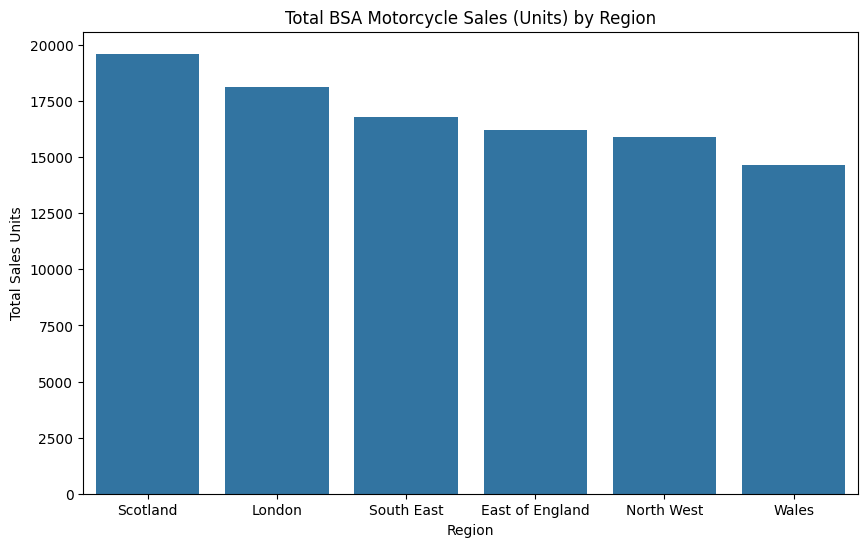

In [4]:
sales_by_region = df.groupby("Region")["Sales_Units"].sum().sort_values(ascending=False)
print("Sales Units by Region vs UK Motorcycle Market")
print(sales_by_region)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title("Total BSA Motorcycle Sales (Units) by Region")
plt.ylabel("Total Sales Units")
plt.xlabel("Region")
plt.show()

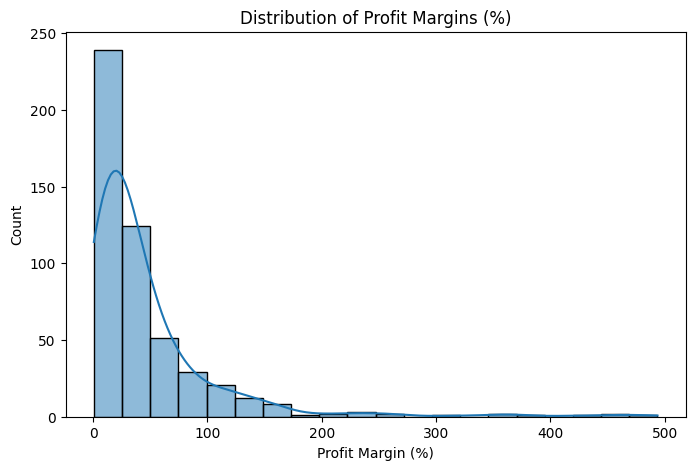

Average Profit Margin:  46.32 %


In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df["Profit_Margin"], bins=20, kde=True)
plt.title("Distribution of Profit Margins (%)")
plt.xlabel("Profit Margin (%)")
plt.show()

print("Average Profit Margin: ", round(df["Profit_Margin"].mean(), 2), "%")

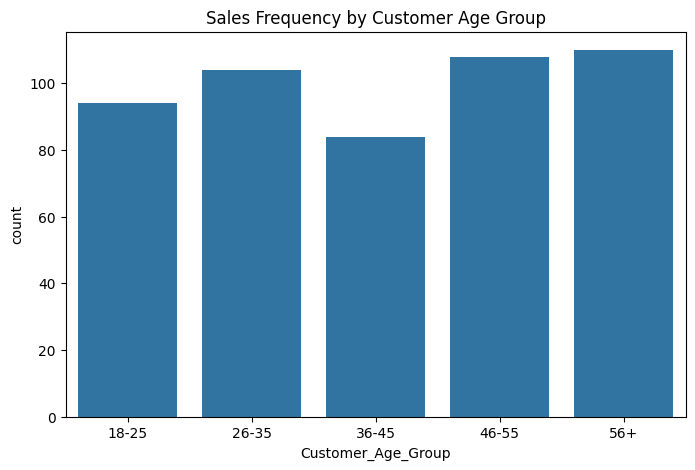

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x="Customer_Age_Group", data=df, order=age_groups)
plt.title("Sales Frequency by Customer Age Group")
plt.show()

Customer_Income_Band
£75k+        42.356115
£50k-£75k    43.646694
<£25k        44.006667
£25k-£50k    56.880450
Name: Profit_Margin, dtype: float64


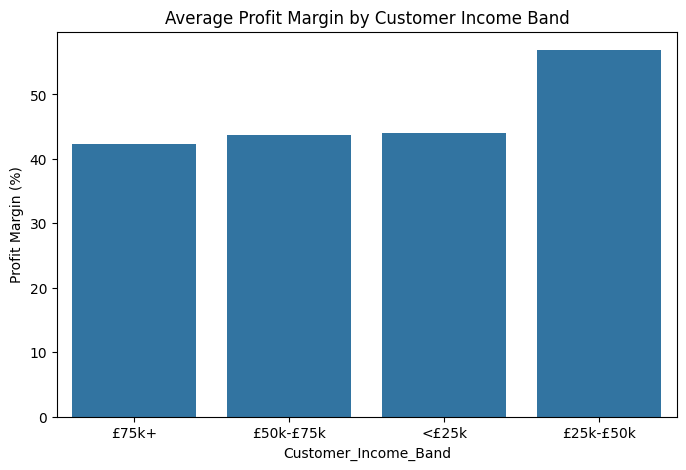

In [7]:
profit_by_income = df.groupby("Customer_Income_Band")["Profit_Margin"].mean().sort_values()
print(profit_by_income)

plt.figure(figsize=(8,5))
sns.barplot(x=profit_by_income.index, y=profit_by_income.values)
plt.title("Average Profit Margin by Customer Income Band")
plt.ylabel("Profit Margin (%)")
plt.show()

In [8]:
df.to_csv("BSA_sales_demographics_UK.csv", index=False)
print("Dataset saved to BSA_sales_demographics_UK.csv")

Dataset saved to BSA_sales_demographics_UK.csv
